In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Notebook to test model predictions

In [3]:
from dataloader import AnomalyDataset

ad = AnomalyDataset("all")
turbine_ad = ad.filter_by_component("turbine_blades")

ad

Loaded 160 files from synthetic dataset at /Users/shyngys/personal/aircraft-engine-anomaly-detection/data/Synthetic_anomaly_dataset
Using existing extracted folder: /Users/shyngys/personal/aircraft-engine-anomaly-detection/data/mvtech/cable
Using existing extracted folder: /Users/shyngys/personal/aircraft-engine-anomaly-detection/data/mvtech/grid
Using existing extracted folder: /Users/shyngys/personal/aircraft-engine-anomaly-detection/data/mvtech/metal_nut
Using existing extracted folder: /Users/shyngys/personal/aircraft-engine-anomaly-detection/data/mvtech/pill
Using existing extracted folder: /Users/shyngys/personal/aircraft-engine-anomaly-detection/data/mvtech/screw
Using existing extracted folder: /Users/shyngys/personal/aircraft-engine-anomaly-detection/data/mvtech/wood
Loaded 2451 files from mvtech dataset.


AnomalyDataset(dataset=all, num_samples=2451) 
                 components={'pistons', 'cable', 'rotors', 'wood', 'turbine_blades', 'oil_pump', 'screw', 'grid', 'metal_nut', 'pill'})

### Clip

In [4]:
from aircraft_anomaly_detection.models.clip_predictor import CLIP

predictor = CLIP(class_names=["damaged", "undamaged"])

# Predict all images in a folder

folder_preds = predictor.predict("../data/mvtech/screw/test/good")
print(folder_preds)


{'002.png': [{'label': 'damaged', 'confidence': 57.23}, {'label': 'undamaged', 'confidence': 42.77}], '016.png': [{'label': 'damaged', 'confidence': 67.74}, {'label': 'undamaged', 'confidence': 32.26}], '017.png': [{'label': 'damaged', 'confidence': 52.86}, {'label': 'undamaged', 'confidence': 47.14}], '003.png': [{'label': 'damaged', 'confidence': 52.39}, {'label': 'undamaged', 'confidence': 47.61}], '029.png': [{'label': 'damaged', 'confidence': 53.27}, {'label': 'undamaged', 'confidence': 46.73}], '015.png': [{'label': 'damaged', 'confidence': 58.38}, {'label': 'undamaged', 'confidence': 41.62}], '001.png': [{'label': 'damaged', 'confidence': 57.75}, {'label': 'undamaged', 'confidence': 42.25}], '000.png': [{'label': 'damaged', 'confidence': 56.22}, {'label': 'undamaged', 'confidence': 43.78}], '014.png': [{'label': 'damaged', 'confidence': 68.26}, {'label': 'undamaged', 'confidence': 31.74}], '028.png': [{'label': 'damaged', 'confidence': 56.96}, {'label': 'undamaged', 'confidence'

In [5]:
image, label, metadata = ad[0]

1
component='rotors' condition='scratched' ground_truth=None description=''


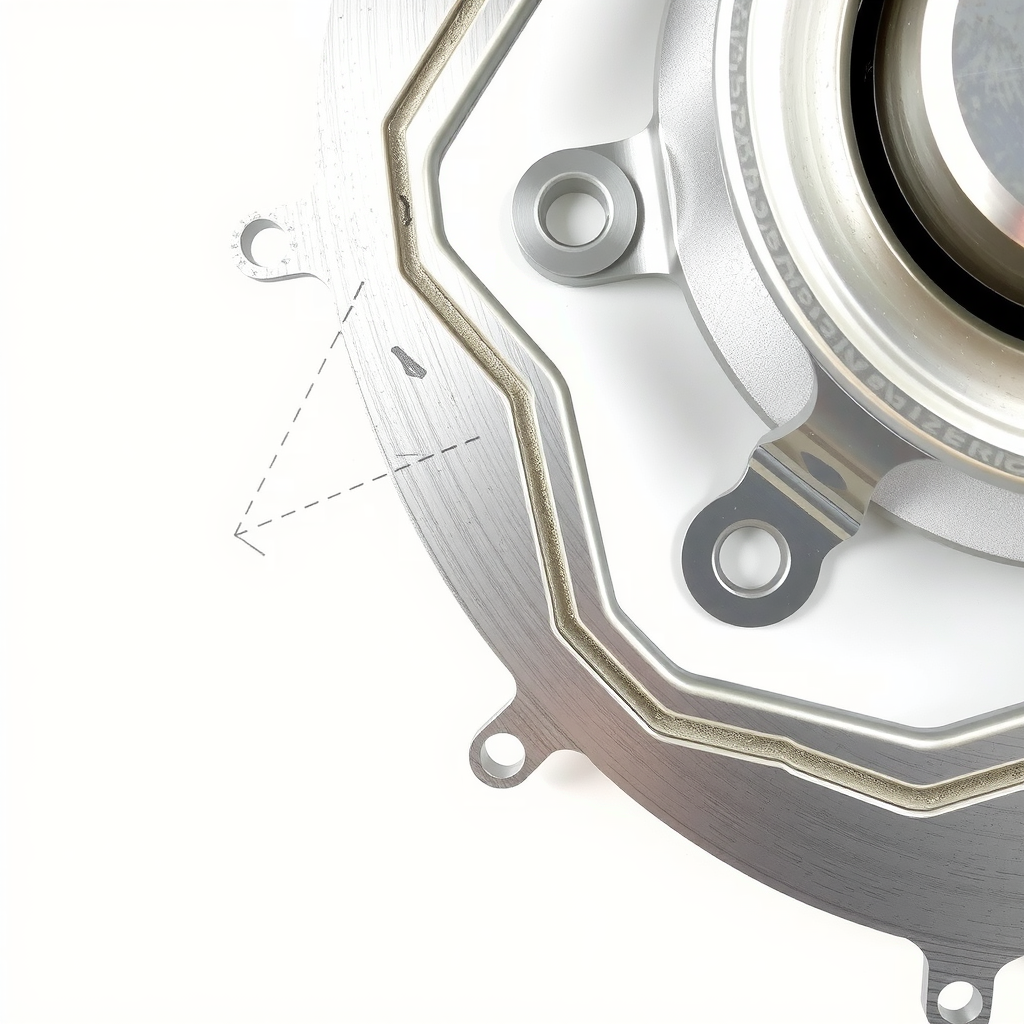

In [6]:
print(label)
print(metadata)
image

In [7]:
predictor.predict_single(
    image,
)  # Predict a single image and class

[{'label': 'undamaged', 'confidence': 86.83},
 {'label': 'damaged', 'confidence': 13.17}]

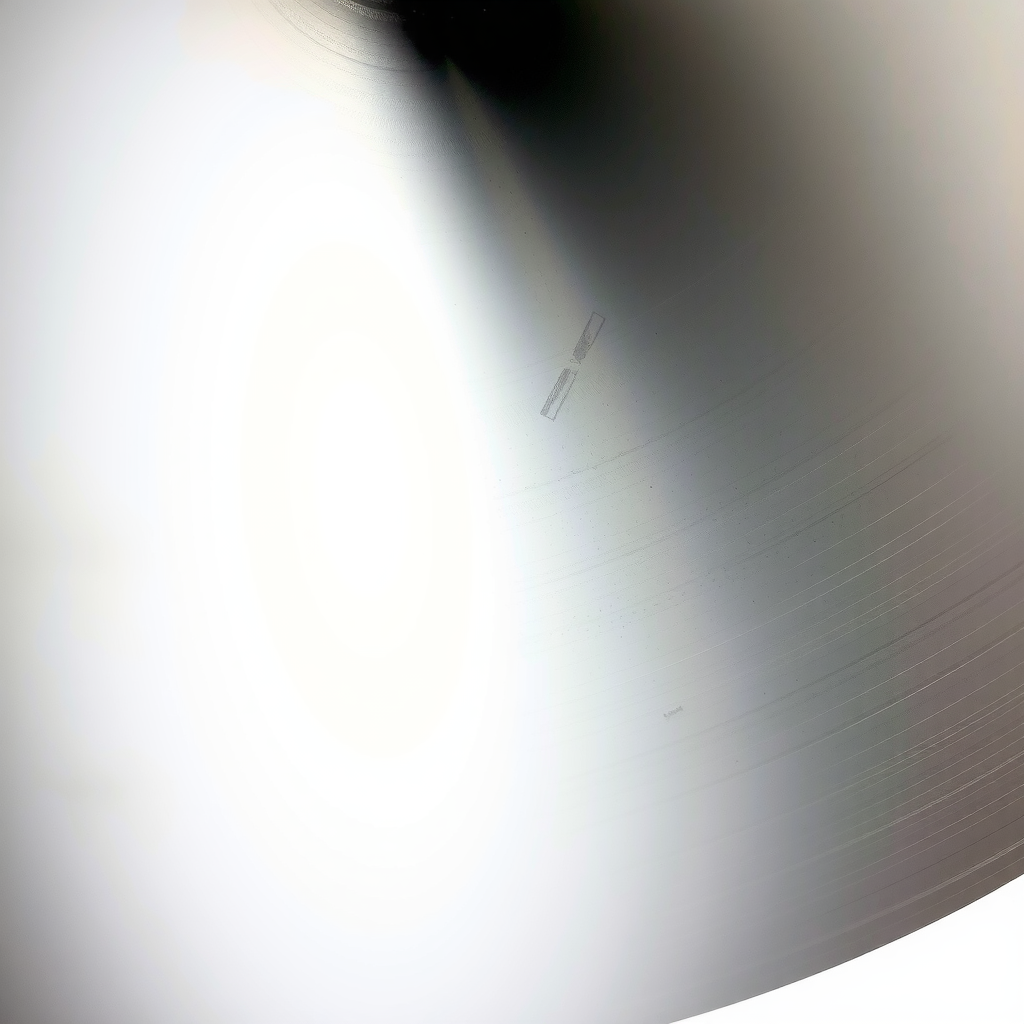

In [9]:
turbine_ad[0][0]

### Grouding Dino + SAM

[0.5984644889831543] ['metal scratch']


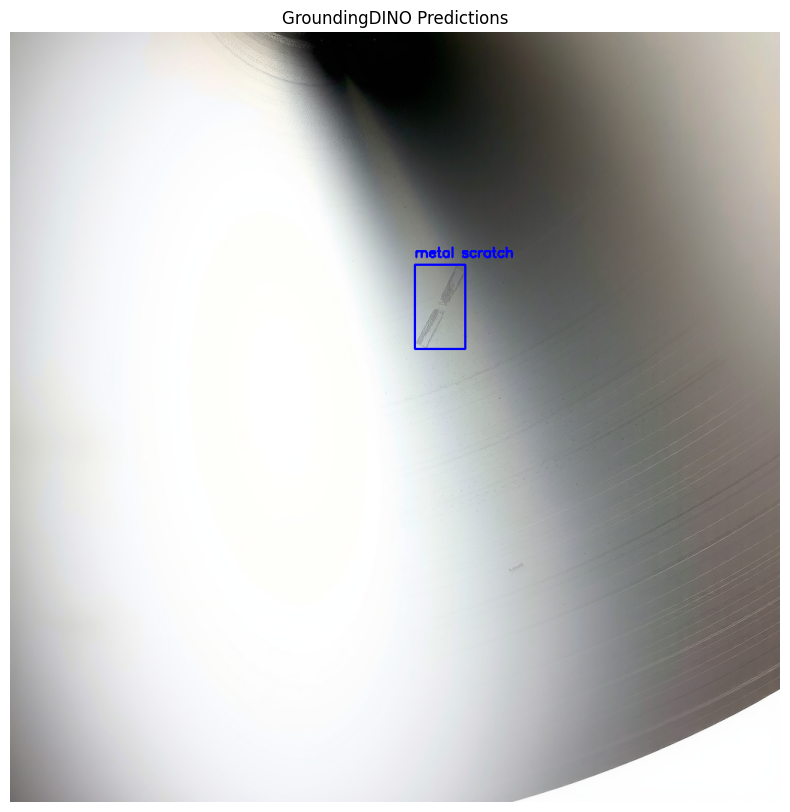

In [18]:
from aircraft_anomaly_detection.models.dino import DINO
from aircraft_anomaly_detection.models.sam import SAM

# image_path = "../data/LTAA-FLUX-Small-test-dataset-generated/Generated/Flux_1.jpg"
image, label, meta = turbine_ad[0]
text_prompt = "metal scratch"


# Init models
dino = DINO()

# DINO prediction
boxes, scores, detected_labels = dino.predict(image_input=image, text_labels=[[text_prompt]])
print(scores, detected_labels)
dino.plot(image, boxes, detected_labels)

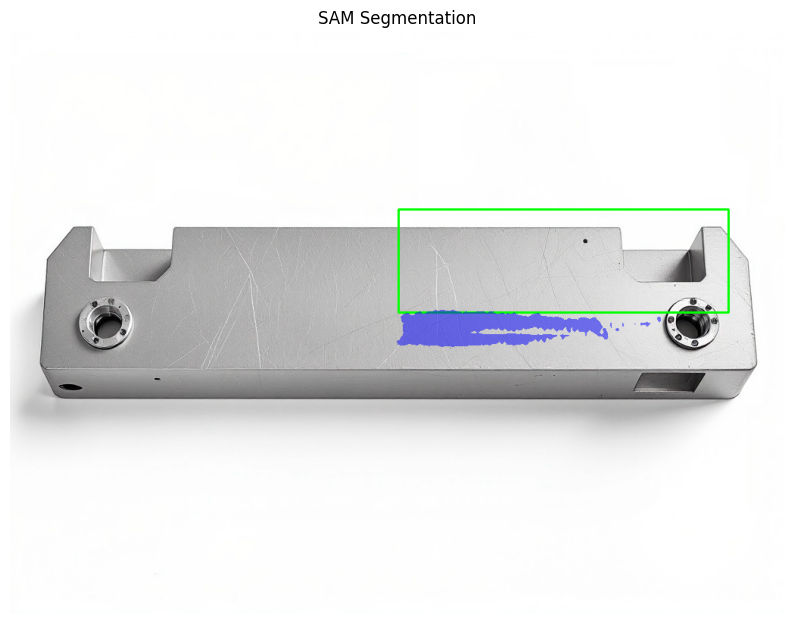

In [2]:
sam = SAM(
    checkpoint_path="../data/weights/sam_vit_h_4b8939.pth",
    model_type="vit_h",
)

masks = sam.predict(image_path, boxes, filter=False)
sam.plot(image_path, boxes, masks, filter=False)

### Owlvit

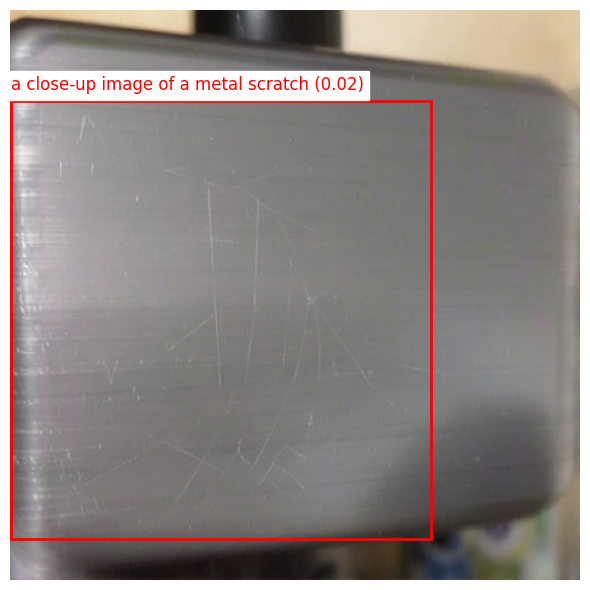

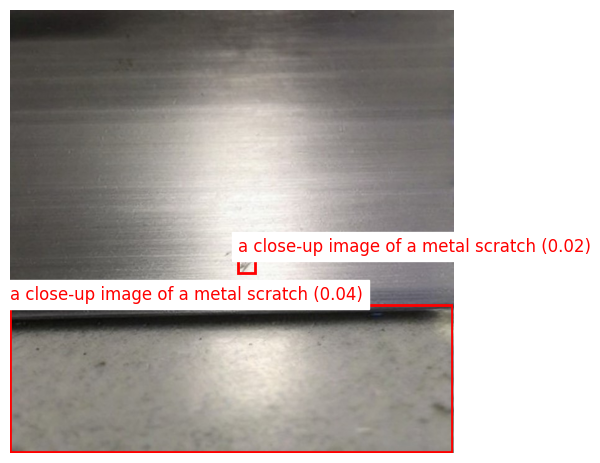

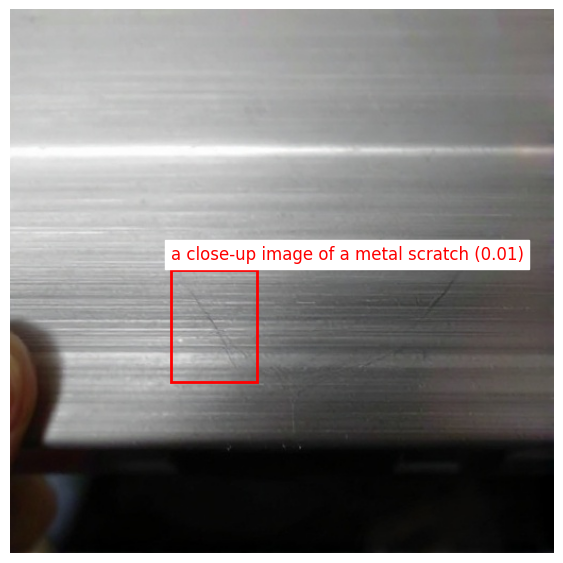

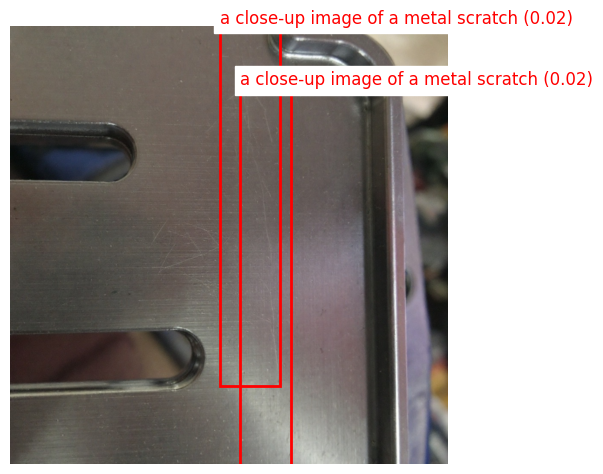

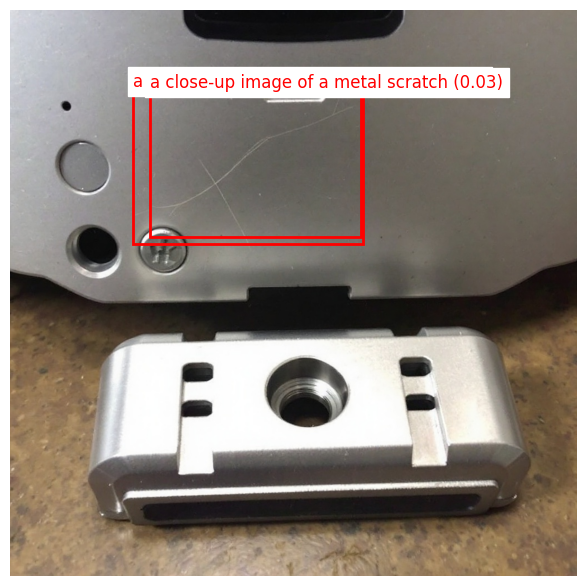

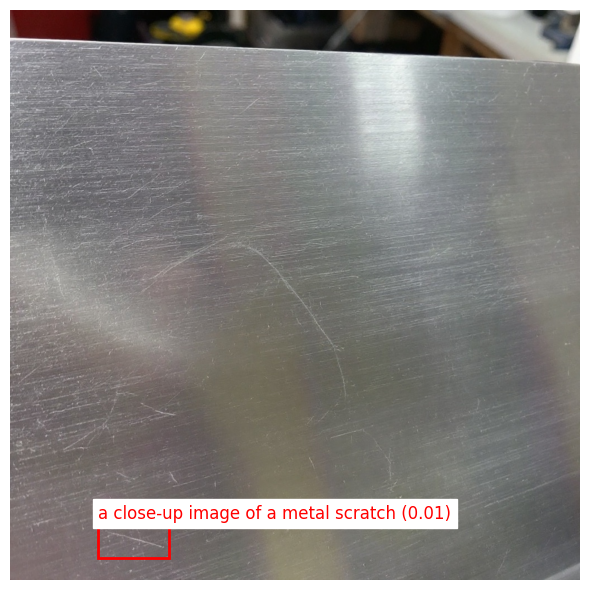

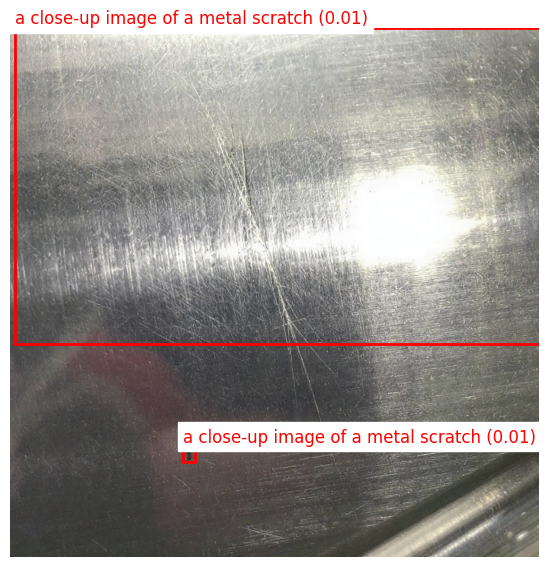

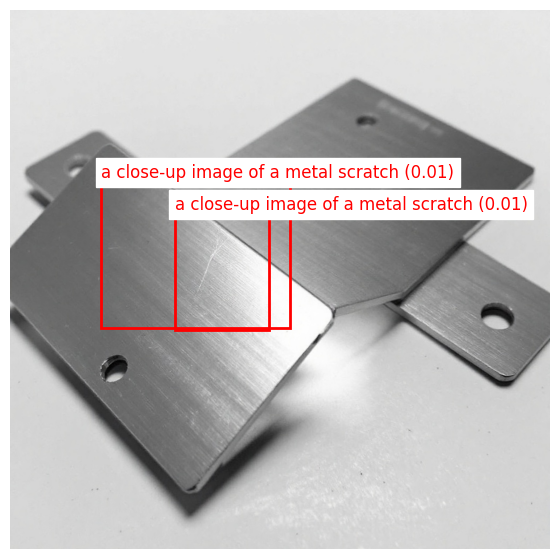

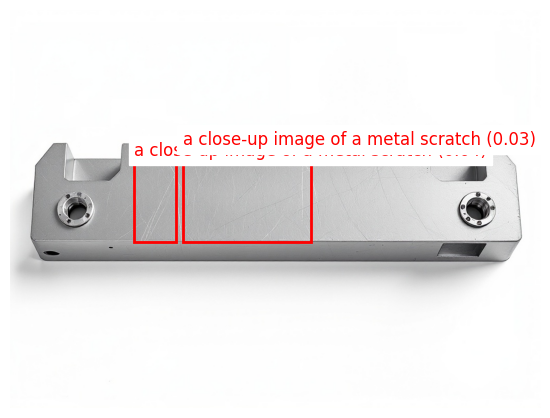

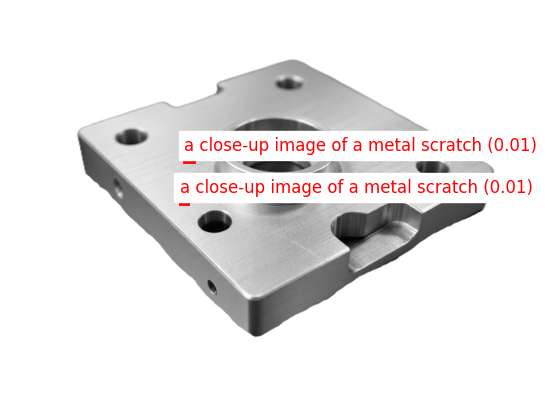

In [ ]:
from aircraft_anomaly_detection.models.owlvit import OwlViT

model_path = "../data/weights/owlvit"
for i in range(1, 11):
    image_path = f"../data/LTAA-FLUX-Small-test-dataset-generated/Generated/Flux_{i}.jpg"
    # image_path = "../data/no_defect/detail_jet-engine-part.jpg"
    texts = ["a clean, undamaged metal surface", "a close-up image of a metal scratch"]

    owlvit = OwlViT(model_path)
    image, boxes, scores, labels = owlvit.predict(
        image_path=image_path, text_prompts=texts, undamaged_idxes=[0], top_k=2
    )

    owlvit.plot(image, texts, boxes, labels, scores)


No defect found
No defect found


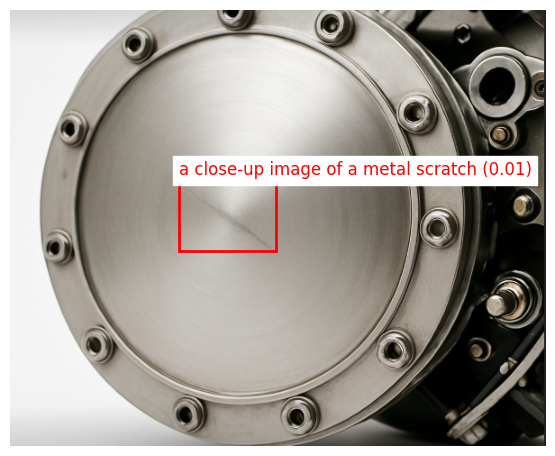

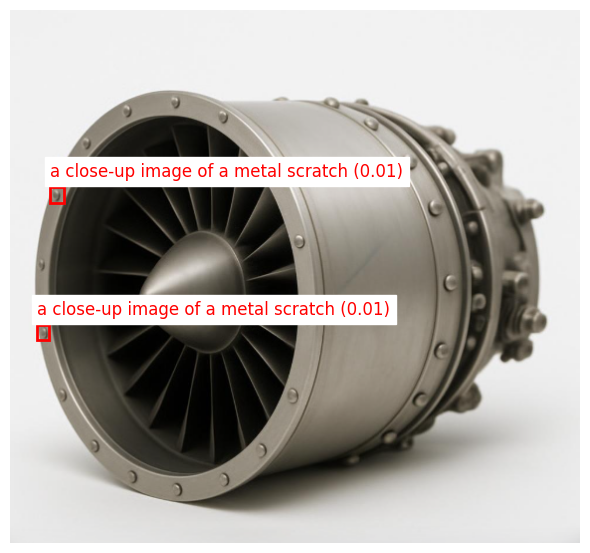

In [ ]:
from aircraft_anomaly_detection.models.owlvit import OwlViT

model_path = "../data/weights/owlvit"

image_path_no_defect = [
    "../data/no_defect/detail_jet-engine-part.jpg",
    "../data/no_defect/gpt_generated.jpg",
    "../data/no_defect/gpt_generated_3.png",
]
texts = ["a clean, undamaged metal surface", "a close-up image of a metal scratch"]

owlvit = OwlViT(model_path)
for image_path in image_path_no_defect:
    image, boxes, scores, labels = owlvit.predict(
        image_path=image_path, text_prompts=texts, undamaged_idxes=[0], top_k=2
    )

    owlvit.plot(image, texts, boxes, labels, scores)